In [2]:
import urllib2
import numpy as np
from sklearn.preprocessing import StandardScaler,normalize
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from collections import namedtuple, Counter, defaultdict
from math import log,ceil,sqrt
import cvxopt
from cvxopt import solvers,matrix
from sklearn import metrics
from math import exp,log10
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
def plot_confusion_matrix(Y_actual,Y_predicted):
    conf_matrix =  metrics.confusion_matrix(Y_actual,Y_predicted)
    sns.heatmap(conf_matrix, annot=True,  fmt='')

In [4]:
####function to normalize the data##

def norm(Z):
    mean = np.sum(Z,axis=0)/len(Z)
    var = []
    for i in range(Z.shape[1]):
        sum1 = 0
        for j in range(Z.shape[0]):
            sum1 += (Z[j,i] - mean[i])**2
        var.append(1. *sum1/len(Z))

    for i in range(Z.shape[1]):
        for j in range(Z.shape[0]):
            Z[j,i] = (Z[j,i] - mean[i])/sqrt(var[i])
    
    
    
            
    return Z
        

In [5]:
###function to predict the accuracy on the basis of the predicted value###

def accuracy(Y,Y_hat):
                
    sum1 = sum([1 for i in range(len(Y)) if Y[i] == Y_hat[i]])
    return (1.0*sum1/len(Y))*100

<type 'numpy.ndarray'>
[[ -2.86412480e-01   4.18085780e-01  -1.11026312e-03   1.01863307e-01
    6.06415114e-01  -5.56291881e-04   1.02764931e-01  -9.81055026e-02
   -3.70475535e-01  -2.69517624e-01   2.97319448e-01  -2.15685035e-01
    7.68931624e-03]
 [ -1.11851050e-01  -4.52169817e-01   4.62665878e-01   2.61633515e-01
   -2.72616620e-02  -1.31563296e-01   5.49455212e-01   4.85384408e-02
    1.76472086e-01  -2.35707305e-01   1.29797785e-01  -2.72166933e-01
    2.42537421e-02]
 [ -2.85150133e-01  -1.46087187e-01  -4.13561677e-01   3.32325555e-01
    1.07426511e-01  -5.01950906e-02   3.59196082e-01  -4.40445294e-01
    5.12373485e-02   4.41091076e-01  -4.63254265e-03   2.80753552e-01
   -5.26297760e-02]
 [ -1.65671403e-01   3.77153651e-01   3.54447382e-01  -1.76899460e-01
   -2.62484985e-01  -1.24312760e-01   1.30494274e-01   2.66645392e-02
    8.31897891e-02   3.54143809e-01   4.50391856e-01   2.28792154e-01
    4.28664099e-01]
 [ -9.10332303e-02   4.38510899e-01  -2.27631512e-01   2.

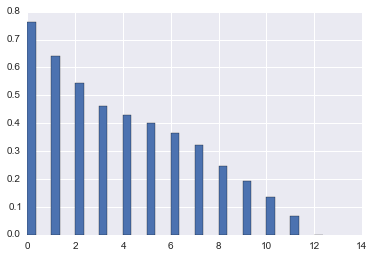

X's shape:  (303, 13)
Z's shape:  (303, 13)
Y's shape:  (303,)


In [6]:
#### getting and preparing the data##
## we also apply PCA here to see if we can reduce the data furture#####


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = urllib2.urlopen(url)
data = data.read()
data = data.split('\n')[:-1]

X = []
Y = []
for i in data:
    
    x = i.split(',')
   
    
    Y.append(float(x[len(x)-1]))
    x = x[0:len(x)-1]
    #print x
    for j in range(len(x)):
        if x[j] == '?':
            #print True
            x[j] = -1
    x = map(float,x)
        
    #print type(i)
    X.append(x)
    
X = np.array(X)

Y = np.reshape(np.array(Y),(len(Y),))
Y[Y > 0] = 1 ###changing the lables to 0 and 1

for i in range(X.shape[1]): #####imputing the missing values with mode of the feature
    m =  mode(X[:,i])[0][0]
    for j in range(X.shape[0]):
        if X[j][i] == -1:
            X[j][i] = m


X_norm = norm(X.copy())##normalizing the data

cov_matrix = np.dot(np.transpose(X_norm),X_norm)
eigen= np.linalg.eig(cov_matrix)
eigen_val = eigen[0]
#print eigen_val
eigen_vec = eigen[1]
print type(eigen_vec)
print eigen_vec
print eigen_vec[0]
total_eigen_val = np.sum(eigen_val)
sum_d = []
for i in range(len(eigen_val)):
    sum_d.append(1. *np.sum(eigen_val[i+1:])/total_eigen_val)
width = 0.35
plt.bar(range(len(eigen_val)),sum_d,width)
plt.show()



W = eigen_vec[:,:]

Z = []
for i in X_norm:
    Z.append(np.dot(np.transpose(W),i))
Z = np.array(Z)

print "X's shape: ", X.shape
print "Z's shape: ", Z.shape
print "Y's shape: ", Y.shape



In [7]:
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']
df = pd.DataFrame(data=X,columns=colnames)
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.934375   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal  
count  303.000000  
mean     4.722772  
std      1.938383  
min      3.000000  
25%      3.000000  
50%      3.000000  
75%      7.000000  
max      7.000000

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


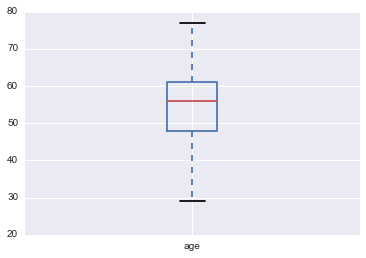

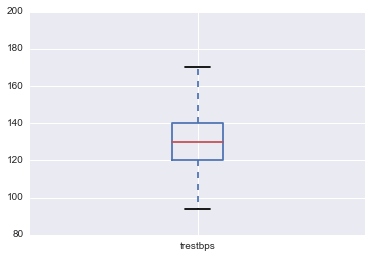

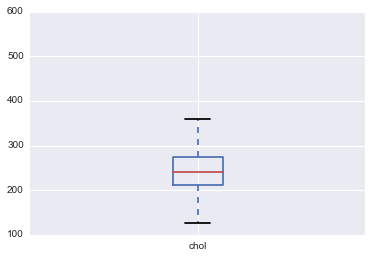

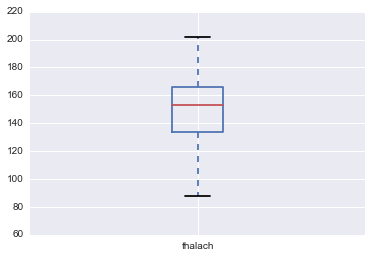

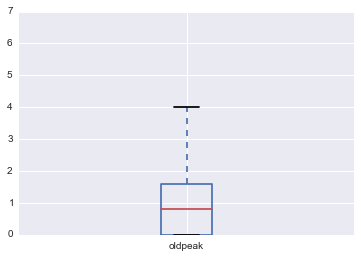

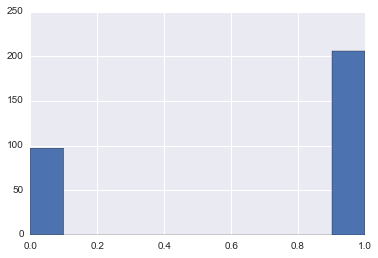

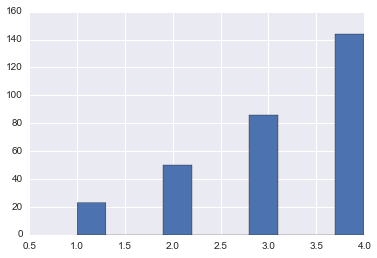

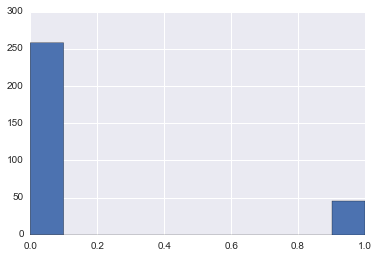

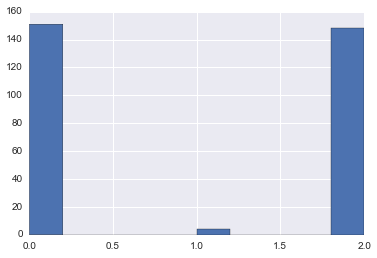

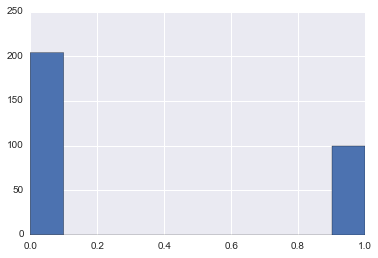

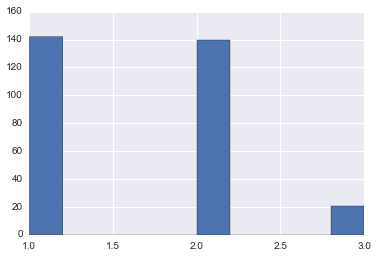

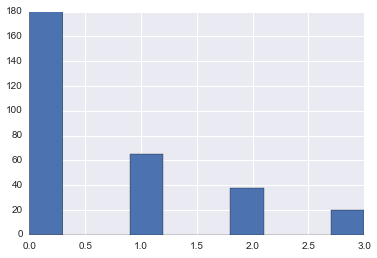

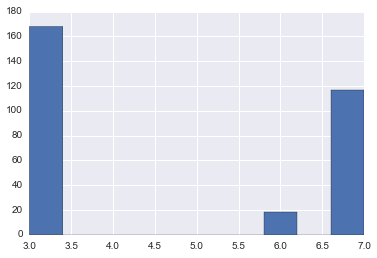

In [8]:
#############exploratory data analysis#######################################

numeric_idx =  [0,3,4,7,9]
categorical_idx = set(range(0,13)) - set(numeric_idx)
def exploratory_data_analysis(numerical,categorical):
    #PLotting Box Plots for numerical attributes.
    for i in numerical:
        df.boxplot(column = colnames[i])
        plt.show()
    #Plotting Histograms to show the class distributions of the features.
    for i in categorical:
        df[colnames[i]].hist()
        plt.show()

exploratory_data_analysis(numeric_idx,categorical_idx)


Accuracy of the Decision Tree is: 69.8113207547
Below are the various statistics for the Decision Tree
             precision    recall  f1-score   support

        0.0       0.73      0.62      0.67        26
        1.0       0.68      0.78      0.72        27

avg / total       0.70      0.70      0.70        53

Confusion Matrix


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


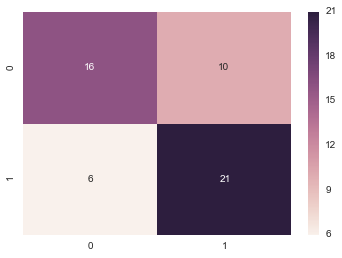

In [9]:
#######ID3##############
UNCLASSIFIED_VALUE = -99

sample_mapping = namedtuple('TrainingSample', ('record', 'target'))


class Id3(object):
    #Initializing the Roote node to None.
    def __init__(self):
        self.root = None
     
    #Method for Fitting the ID3 Classifier.
    def build(self, rows, target):
        training_recs = []
        for i,j in zip(rows,target):
            training_recs.append(sample_mapping(i,j))
        
        #Calling function to create the decision tree.
        self.root = self.decision_tree(training_recs, features_pred = range(len(rows[0])))
    #Method used for creation of the decision tree. This method would be used for the recursive creation of the Childrens 
    #(Decision tree) too.
    
    def most_common(self,rows):
        classes = []
        for i in rows:
            classes.append(i.target)
        most_common_class = Counter(classes).most_common()[0][0]
        return most_common_class
    
    def decision_tree(self, rows, features_pred):
        #Checking if all the features have been used for making the decision. Assign the classes which are most common at th
        #parent node.
        
        if len(features_pred) == 0:
            class_def = self.most_common(rows)
            root = CreateLeaf(class_def) 
        else:
            classes = []
            for i in rows:
                classes.append(i.target)
            if len(set(classes)) == 1:
                assign_target_class = rows[0].target
                root = CreateLeaf(assign_target_class)
            else:
                split_attribute = self.select_best_attribute(rows,features_pred,classes)
                root = CreateNode(split_attribute)
                best_attr_val = set([i.record[split_attribute] for i in rows])
                #Check for the vals for splitting.
                for val in best_attr_val:
                    rec = []
                    for i in rows:
                        if i.record[split_attribute] == val:
                            rec.append(i)
                    #create children nodes.
                    child = self.decision_tree(rec,features_pred)
                    root[val] = child
        return root
     
    
    def select_best_attribute(self, rows, features, classes):
        ig = []
        for i in features:
            ig.append((self.info_gain_calc(rows, i, classes), i))
        best_attr = sorted(ig, key=lambda x: x[1])[-1][1]
        features.pop(features.index(best_attr))
        return best_attr

    def info_gain_calc(self, rows, feature, classes):
        branches = defaultdict(list)
        entropy_before = self.entropy(classes)
        for i in rows:
            branches[i.record[feature]].append(i)
        after_branching_entropy = 0.0
        for i in branches.values():
            class_branch = []
            for j in i:
                class_branch.append(j.target)
            after_branching_entropy += (len(branches) / len(rows)) * self.entropy(class_branch)
        return entropy_before - after_branching_entropy
    
  
    def entropy(self,data):
        def log2(x):
            if x == 0:
                return 0
            else:
                return log(x)/log(2)
        counter = Counter(data)
        N = len(data)
        ent = []
        for i in counter:
            ent.append(-1.0*(counter[i] / len(data))*log2(counter[i] / len(data)))
        return sum(ent)
    
    def predict(self, X, allow_unclassified=False):
        class_def = 1
        if allow_unclassified:
            class_def = UNCLASSIFIED_VALUE
        predicted = []

        for sample in X:
            clas = None
            current_node = self.root
            while clas is None:
                if current_node.is_leaf():
                    clas = current_node.clas
                else:
                    
                    key_value = sample[current_node.feature]
                    if key_value in current_node:
                        current_node = current_node[key_value]
                    else:
                        clas = class_def
            predicted.append(clas)
        return predicted
   
    

class CreateNode(dict):
    #instances = []
    def __init__(self, feature):
        self.feature = feature
        #CreateNode.instances.append(self) #Added for keeping track the instances

    def is_leaf(self):
        return False


class CreateLeaf(dict):
    #inst = []
    def __init__(self, clas):
        #CreateLeaf.inst.append(self) #Added for keeping track the instances
        self.clas = clas

    def is_leaf(self):
        return True
clf = Id3()
clf.build(X_norm[:250],Y[:250])
Y_hat_id3 = clf.predict(X_norm[250:])

#print "Accuracy of the ID3 algorithm is: %s" %(accuracy(Y[250:],Y_hat_id3))
print "Accuracy of the Decision Tree is: %s" %(accuracy(Y[250:],Y_hat_id3))
print "Below are the various statistics for the Decision Tree"
print "======================================================="
print metrics.classification_report(Y[250:],Y_hat_id3)
print "Confusion Matrix"
print "================"
plot_confusion_matrix(Y[250:],Y_hat_id3) 

//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((250, 1), 5) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


     pcost       dcost       gap    pres   dres
 0: -1.0681e+02 -4.2576e+03  9e+03  6e-01  4e-15
 1: -8.8012e+01 -9.8116e+02  9e+02  2e-14  3e-15
 2: -1.7586e+02 -3.8806e+02  2e+02  9e-15  3e-15
 3: -2.1012e+02 -2.7112e+02  6e+01  3e-15  3e-15
 4: -2.2170e+02 -2.4004e+02  2e+01  2e-14  3e-15
 5: -2.2589e+02 -2.3025e+02  4e+00  7e-15  4e-15
 6: -2.2700e+02 -2.2779e+02  8e-01  1e-15  4e-15
 7: -2.2724e+02 -2.2727e+02  3e-02  1e-14  4e-15
 8: -2.2725e+02 -2.2726e+02  3e-03  1e-15  4e-15
 9: -2.2725e+02 -2.2725e+02  8e-05  2e-14  4e-15
Optimal solution found.
75.4716981132
Accuracy of the SVM Model is: 75.4716981132
Below are the various statistics for the SVM Model
             precision    recall  f1-score   support

        0.0       0.68      0.96      0.79        26
        1.0       0.94      0.56      0.70        27

avg / total       0.81      0.75      0.74        53

Confusion Matrix


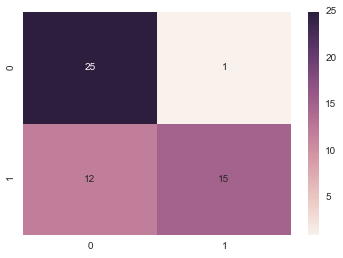

In [10]:
#####################gaussian SVM##########################


def prediction_gaussian(X,X_SV,Y_SV,W0,alpha_SV):
    
    Y_hat = []
    
    for x in X:
        
        sum1 = 0
        
        for i in range(len(alpha_SV)):
            
            sum1 += alpha_SV[i]*Y_SV[i]*gaussian_similarity(X_SV[i],x)
        
        if sum1 + W0 > 0:
            
            
            Y_hat.append(1)
        
        else:
            
            Y_hat.append(-1)
            
    return np.array(Y_hat)   

def gaussian_similarity(X,Y,sigma = 3.0):
    #m = np.dot(np.transpose(X-Y),(X-Y))
    return np.exp((-(np.linalg.norm(X-Y)**2))/(2*sigma**2))


def gram_matrix_gaussian(X):
    m = len(X)
    gram = np.zeros(shape=(m,m))
    for i in range(m):
        x = X[i]
        for j in range(m):        
            y = X[j]
            gram[i][j] += gaussian_similarity(x,y)
    
    return gram


def training_gaussian(X,Y,e,c):
    
    P = (gram_matrix_gaussian(X)) * (np.dot(Y,np.transpose(Y)))
    #print P
    q = np.zeros(shape=(X.shape[0],1))
    q.fill(-1)
    
    G1 = np.zeros(shape=(X.shape[0],X.shape[0]))
    np.fill_diagonal(G1,-1)
    
    G2 = np.zeros(shape=(X.shape[0],X.shape[0]))
    np.fill_diagonal(G2,1)
    
    G = np.concatenate((G1,G2))
    
    H1 = np.zeros(shape = (X.shape[0],1))
    H2 = np.full((X.shape[0],1),c)
    H = np.concatenate((H1,H2))
    
    A = np.transpose(Y)
    
    b = 0
    
    soln = solvers.qp(matrix(P,tc = 'd'),
                  matrix(q,tc = 'd'),
                  matrix(G,tc = 'd'),
                  matrix(H,tc = 'd'),
                  matrix(A,tc = 'd'),
                  matrix(b,tc='d'))
    
    alpha = (np.ravel(soln['x']))
    #alpha = np.reshape(np.array(alpha),(len(alpha),1))
    
    #print alpha
     
    alpha_SV = alpha[alpha>e]
    X_SV = X[alpha>e]
    Y_SV = Y[alpha>e]
    index = np.where(alpha>e)
    
    #print alpha_SV
    #print X_SV
    #print Y_SV
    #print index[0]
    
    #print len(index[0])
    
    W0 = 0
    for i in range(len(alpha_SV)):
        sum1 = 0
        for j in range(len(alpha_SV)):
            sum1 += alpha_SV[j]*Y_SV[j]*gaussian_similarity(X[j],X[i])
        W0 += Y[i] - sum1
    
    W0 = 1. * W0/len(alpha_SV) 
    
    #print W0
    
    
    
    return (alpha_SV,X_SV,Y_SV,W0,index[0])




def gaussian_SVM(X,Y,e,c):
    Y = np.reshape(np.array(Y),(len(Y),1))
    Y[Y == 0] = -1
    alpha_SV,X_SV,Y_SV,W0,index = training_gaussian(X[:250],Y[:250],e,c)
    #plotting_SVs(X[:0.75 * len(X)],Y[:0.75 * len(X)],index)
    Y_hat_svm = prediction_gaussian(X[250:],X_SV,Y_SV,W0,alpha_SV)
    #print Y_hat
    print accuracy(Y[250:],Y_hat_svm)
    Y_hat_svm[Y_hat_svm == -1] = 0
    return Y_hat_svm



Y_hat_svm = gaussian_SVM(X_norm,Y,0.0001,5)


print "Accuracy of the SVM Model is: %s" %(accuracy(Y[250:],Y_hat_svm))
print "Below are the various statistics for the SVM Model"
print "=================================================="
print metrics.classification_report(Y[250:],Y_hat_svm)
print "Confusion Matrix"
print "================"

plot_confusion_matrix(Y[250:],Y_hat_svm) 




73.893896868
73.0533882901
70.8871571472
68.2519227142
65.2243795029
62.5233409209
60.1364679699
58.0637113476
56.2353037832
54.6131232821
53.1627047172
51.8598957611
50.6850102886
49.6222669067
48.6584228267
47.7822255659
46.9839600838
46.2551676376
45.5884365525
44.9772468653
44.4158476391
43.8991570982
43.4226789414
42.9824308649
42.5748826926
42.1969023677
41.8457085591
41.5188289493
41.2140634646
40.9294518431
40.663245029
40.4138799489
40.1799572858
39.9602219098
39.7535456635
39.5589122363
39.3754038899
39.2021898217
39.0385159807
38.8836961636
38.7371042422
38.5981673864
38.4663601608
38.3411993877
38.2222396778
38.1090695442
38.0013080217
37.8986017245
37.8006222825
37.7070641055
37.6176424287
37.5320916026
37.4501635927
37.371626662
37.2962642111
37.2238737568
37.154266031
37.0872641855
37.0227030913
36.9604287191
36.9002975935
36.8421763108
36.785941112
36.7314775031
36.678679914
36.6274513867
36.5777032857
36.5293550183
36.4823337581
36.4365741597
36.3920180551
36.348614124

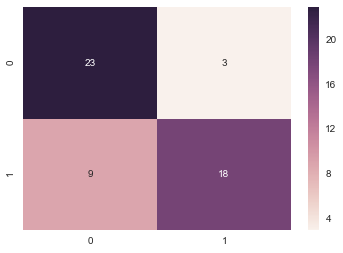

In [11]:
###################### NUERAL NETWORK#######################


def indicator(y,cls):
    if y==cls:
        return 1.0
    else:
        return 0.0


def softmax(V,z,k):
    
    
    #print z.shape
    d = 0
    for v in V:
        
        #print v.shape
        
        d += exp(np.dot(np.transpose(v),z))
    n = exp(np.dot(np.transpose(V[k]),z))
    return (1.*n/d)


def sigmoid(w,x):
    
    return (1/(1 + exp(-np.dot(np.transpose(w),x))))

def compute_Z_Y(X,W,V):
    
    Z = []
    
    Y_hat = []
    
    for i in range(X.shape[0]):
        
        z = [1.0]
        
        y = []
        
        for w in W:
        
            z.append(sigmoid(w,X[i]))
        
        Z.append(z)          
            
        for k in range(V.shape[0]):
            
            #print k
            
            y.append(softmax(V,z,k))
            
            #print y
        
        Y_hat.append(y)
        
    #print Z
    #print Y_hat
              
    return np.array(Z),np.array(Y_hat)

def likelihood(X,Y,K,Y_hat):
    
    l = 0
    for i in range(X.shape[0]):
        for k in range(K):
            l += indicator(Y[i],k) * (log10(Y_hat[i][k]))
    l = - l
    return l

def compute_Y_pred(Y_hat):
    Y_pred = []
    for y_hat in Y_hat:
        #print y_hat
        
        Y_pred.append(np.argmax(y_hat))
            
    return np.reshape(np.array(Y_pred),(len(Y_pred),1))

def training(X,Y,cat,H,lr):
    
    W = np.zeros(shape=(H,X.shape[1]))
    
    W.fill(0.00)
    
    K = len(cat)
    
    V = np.zeros(shape=(K,H+1))
    
    V.fill(0.00)
    
    Z,Y_hat = compute_Z_Y(X,W,V)
    
    l_new = likelihood(X,Y,K,Y_hat)
    
    it = 0
    
    best = False
    
    while best == False: 
        
        l_pre = l_new
        
    
        for k in range(K):

            grad_V = 0

            for i in range(X.shape[0]):

                grad_V += (Y_hat[i][k] - indicator(Y[i],k))* Z[i]

            #print grad_V

            V[k] = V[k] - (lr*grad_V)



        for h in range(H):

            grad_W = 0

            for i in range(X.shape[0]):

                x = 0

                for k in range(K):

                    x += (Y_hat[i][k] - indicator(Y[i],k)) * V[k][h+1]


                    grad_W +=  x * Z[i][h+1] * (1.0 - Z[i][h+1]) * X[i]

                W[h] = W[h] - lr*grad_W


        Z,Y_hat = compute_Z_Y(X,W,V)

        it += 1

        l_new = likelihood(X,Y,K,Y_hat)
        
        print l_new
        
        if it==100 or abs(l_new-l_pre) < 0.01:
            
            best = True
        
        
    return V,W

cat = (set(Y))
V,W = training(X_norm[:250],Y[:250],cat,50,0.001)


Z_test,Y_hat = compute_Z_Y(X_norm[250:],W,V)


Y_hat_nn = compute_Y_pred(Y_hat)

print "testing error", accuracy(Y[250:],Y_hat_nn)


print "Accuracy of the Neural Network Model is: %s" %(accuracy(Y[250:],Y_hat_nn))
print "Below are the various statistics for the Neural Network Model"
print "=================================================="
print metrics.classification_report(Y[250:],Y_hat_nn)
print "Confusion Matrix"
print "================"





plot_confusion_matrix(Y[250:],Y_hat_nn) 

In [ ]:
######Bag boosting approach#############

Y_pred = []
for i in range(len(Y_hat_id3)):
    m = mode([Y_hat_id3[i],Y_hat_nn[i],Y_hat_svm[i]])
    #print m
    Y_pred.append(m[0][0])
print "Accuracy of the Bagging approach is: %s" %(accuracy(Y[250:],Y_pred))
print "Below are the various statistics for the Ensemble model"
print "======================================================="
print metrics.classification_report(Y[250:],Y_pred)
print "Confusion Matrix"
print "================"
plot_confusion_matrix(Y[250:],Y_pred)  